# Setting up
This script is has code used in anaysing the population structure from genetic data using pegas r package - "Population and Evolutionary Genetics Analysis System"

### testing and installing packages:

In [1]:
requiredPackages = c("pegas","ape","adegenet")
cat("\nChecking if needed packages are installed... 'pegas','ape' and 'adegenet'\nDependencies are ‘e1071’, ‘gtools’, ‘classInt’, ‘units’, ‘gdata’, ‘httpuv’, ‘htmltools’, ‘later’, ‘promises’, ‘rlang’, ‘fastmap’, ‘segmented’, ‘sp’, ‘spData’, ‘sf’, ‘deldir’, ‘LearnBayes’, ‘coda’, ‘expm’, ‘gmodels’, ‘permute’, ‘ade4’, ‘shiny’, ‘seqinr’, ‘spdep’, ‘vegan’\n\nIncase of errors installing this packages then kindly try to install the individually and trouble shoot any errors.")
for(p in requiredPackages)
        if(p %in% rownames(installed.packages()) == FALSE) {
        install.packages(p)
} else {
        cat("\nExcellent", p, " already installed. loading", p, "...")
        ## loads dplyr and magrittr packages
        suppressMessages(library(p, character.only = T))
}
cat("\nDone...\n")


Checking if needed packages are installed... 'pegas','ape' and 'adegenet'
Dependencies are ‘e1071’, ‘gtools’, ‘classInt’, ‘units’, ‘gdata’, ‘httpuv’, ‘htmltools’, ‘later’, ‘promises’, ‘rlang’, ‘fastmap’, ‘segmented’, ‘sp’, ‘spData’, ‘sf’, ‘deldir’, ‘LearnBayes’, ‘coda’, ‘expm’, ‘gmodels’, ‘permute’, ‘ade4’, ‘shiny’, ‘seqinr’, ‘spdep’, ‘vegan’

Incase of errors installing this packages then kindly try to install the individually and trouble shoot any errors.
Excellent pegas  already installed. loading pegas ...
Excellent ape  already installed. loading ape ...
Excellent adegenet  already installed. loading adegenet ...
Done...


In [2]:
input_fa <- "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/Phlebotomus_133_ed.fasta"
d <- ape::read.dna(input_fa, format='fasta')
d

133 DNA sequences in binary format stored in a matrix.

All sequences of same length: 658 

Labels:
sp-Phlebotomus_ariasi|country-Algeria
sp-Phlebotomus_ariasi|country-Algeria
sp-Phlebotomus_ariasi|country-Algeria
sp-Phlebotomus_chadlii|country-Algeria
sp-Phlebotomus_chadlii|country-Algeria
sp-Phlebotomus_chadlii|country-Algeria
...

Base composition:
    a     c     g     t 
0.287 0.175 0.163 0.375 
(Total: 87.51 kb)

In [3]:
e <- ape::dist.dna(d)
e

                                                                         sp-Phlebotomus_ariasi|country-Algeria
sp-Phlebotomus_ariasi|country-Algeria                                                              0.000000000
sp-Phlebotomus_ariasi|country-Algeria                                                              0.000000000
sp-Phlebotomus_chadlii|country-Algeria                                                             0.075824772
sp-Phlebotomus_chadlii|country-Algeria                                                             0.075824772
sp-Phlebotomus_chadlii|country-Algeria                                                             0.074051721
sp-Phlebotomus_perniciosus|country-Algeria                                                         0.173830939
sp-Phlebotomus_perniciosus|country-Algeria                                                         0.169912258
sp-Phlebotomus_perniciosus|country-Algeria                                                         0.171904292
s

In [4]:
h <- pegas::haplotype(d)
h <- sort(h, what = "label")
h


Haplotypes extracted from: d 

    Number of haplotypes: 71 
         Sequence length: 658 

Haplotype labels and frequencies:

      I      II     III      IV      IX       L      LI     LII    LIII     LIV 
      3       1       1       1       1       1       1       1       1       1 
    LIX      LV     LVI    LVII   LVIII      LX     LXI    LXII   LXIII    LXIV 
      1       1       1       1       1       1       2       1       2       2 
   LXIX     LXV    LXVI   LXVII  LXVIII     LXX    LXXI       V      VI     VII 
      1       1       1       1       1       1       1       1       1       1 
   VIII       X      XI     XII    XIII     XIV     XIX      XL     XLI    XLII 
     19       1       1       1       1       1       1       1       3       1 
  XLIII    XLIV    XLIX     XLV    XLVI   XLVII  XLVIII      XV     XVI    XVII 
      1       1       1       1       1       2       2       1       1       1 
  XVIII      XX     XXI    XXII   XXIII    XXIV    XXIX     X

Haplotype network with:
  71 haplotypes
  804 links
  link lengths between 1 and 82 steps

Use print.default() to display all elements.

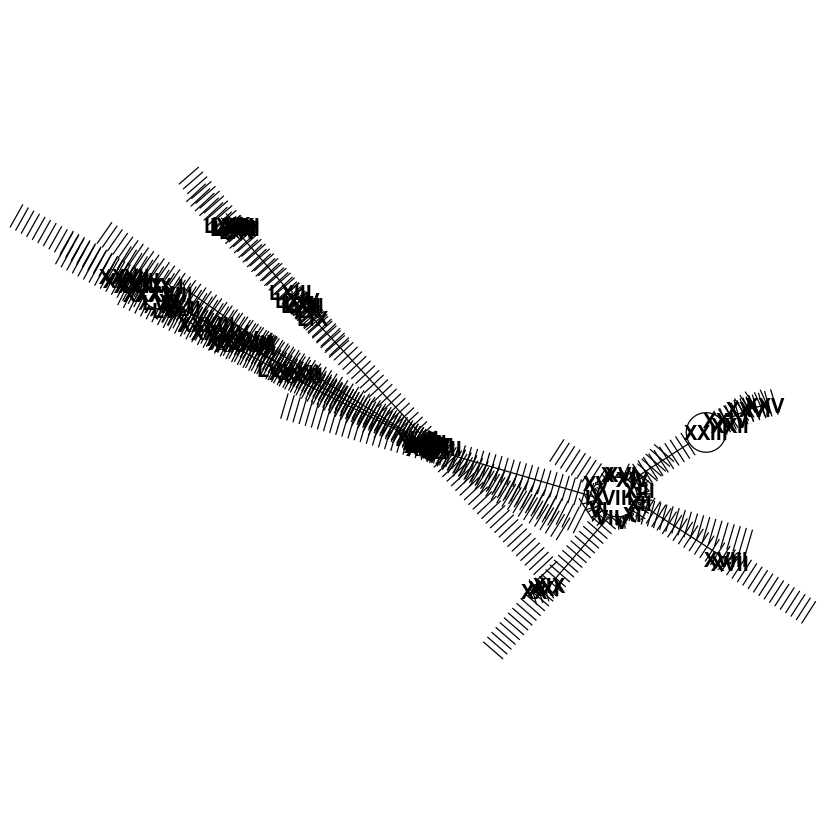

In [5]:
net <- pegas::haploNet(h, getProb = TRUE)
net
#print.default(net)
plot(net, size =attr(net, "freq"), fast = FALSE)

In [6]:
ind.hap<-with(
    stack(setNames(attr(h, "index"), rownames(h))),
    table(hap=ind, pop=rownames(d)[values])
)
mydata <- as.data.frame(ind.hap)
good <- mydata[mydata$Freq == 1,]
good
#ind.hap

,hap,pop,Freq
69,XXXVI,sp-NA|country-Egypt,1
70,XXXVII,sp-NA|country-Egypt,1
109,XL,sp-NA|country-Kenya,1
138,XXXIX,sp-NA|country-Kenya,1
213,XXXVIII,sp-NA|country-Senegal,1
290,L,sp-Phlebotomus_alexandri|country-Algeria,1
291,LI,sp-Phlebotomus_alexandri|country-Algeria,1
292,LII,sp-Phlebotomus_alexandri|country-Algeria,1
293,LIII,sp-Phlebotomus_alexandri|country-Algeria,1
294,LIV,sp-Phlebotomus_alexandri|country-Algeria,1


In [7]:
?strsplit

strsplit {base},R Documentation
x,"character vector, each element of which is to be split. Other inputs, including a factor, will give an error."
split,"character vector (or object which can be coerced to such) containing regular expression(s) (unless fixed = TRUE) to use for splitting. If empty matches occur, in particular if split has length 0, x is split into single characters. If split has length greater than 1, it is re-cycled along x."
fixed,"logical. If TRUE match split exactly, otherwise use regular expressions. Has priority over perl."
perl,logical. Should Perl-compatible regexps be used?
useBytes,"logical. If TRUE the matching is done byte-by-byte rather than character-by-character, and inputs with marked encodings are not converted. This is forced (with a warning) if any input is found which is marked as ""bytes"" (see Encoding)."


In [8]:
locations <- strsplit(as.character(good$pop),"|")
locations

[[1]]
 [1] "s" "p" "-" "N" "A" "|" "c" "o" "u" "n" "t" "r" "y" "-" "E" "g" "y" "p" "t"

[[2]]
 [1] "s" "p" "-" "N" "A" "|" "c" "o" "u" "n" "t" "r" "y" "-" "E" "g" "y" "p" "t"

[[3]]
 [1] "s" "p" "-" "N" "A" "|" "c" "o" "u" "n" "t" "r" "y" "-" "K" "e" "n" "y" "a"

[[4]]
 [1] "s" "p" "-" "N" "A" "|" "c" "o" "u" "n" "t" "r" "y" "-" "K" "e" "n" "y" "a"

[[5]]
 [1] "s" "p" "-" "N" "A" "|" "c" "o" "u" "n" "t" "r" "y" "-" "S" "e" "n" "e" "g"
[20] "a" "l"

[[6]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[7]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[8]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[9]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[10]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[11]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[12]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[13]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[14]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[15]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "a" "l" "e" "x"
[20] "a" "n" "d" "r" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[16]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "b" "e" "r" "g"
[20] "e" "r" "o" "t" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r"
[39] "i" "a"

[[17]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "b" "e" "r" "g"
[20] "e" "r" "o" "t" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "E" "t" "h" "i" "o"
[39] "p" "i" "a"

[[18]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "b" "e" "r" "g"
[20] "e" "r" "o" "t" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "E" "t" "h" "i" "o"
[39] "p" "i" "a"

[[19]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "c" "f" "." "_"
[20] "l" "e" "s" "l" "e" "y" "a" "e" "|" "c" "o" "u" "n" "t" "r" "y" "-" "E" "t"
[39] "h" "i" "o" "p" "i" "a"

[[20]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "c" "f" "." "_"
[20] "l" "e" "s" "l" "e" "y" "a" "e" "|" "c" "o" "u" "n" "t" "r" "y" "-" "E" "t"
[39] "h" "i" "o" "p" "i" "a"

[[21]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "c" "f" "." "_"
[20] "l" "e" "s" "l" "e" "y" "a" "e" "|" "c" "o" "u" "n" "t" "r" "y" "-" "E" "t"
[39] "h" "i" "o" "p" "i" "a"

[[22]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "c" "f" "." "_"
[20] "l" "e" "s" "l" "e" "y" "a" "e" "|" "c" "o" "u" "n" "t" "r" "y" "-" "E" "t"
[39] "h" "i" "o" "p" "i" "a"

[[23]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "c" "h" "a" "b"
[20] "a" "u" "d" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r" "i"
[39] "a"

[[24]]
 [1] "s" "p" "-" "P" "h" "l" "e" "b" "o" "t" "o" "m" "u" "s" "_" "c" "h" "a" "d"
[20] "l" "i" "i" "|" "c" "o" "u" "n" "t" "r" "y" "-" "A" "l" "g" "e" "r" "i" "a"

[[25]]
 [1] "s" "p"

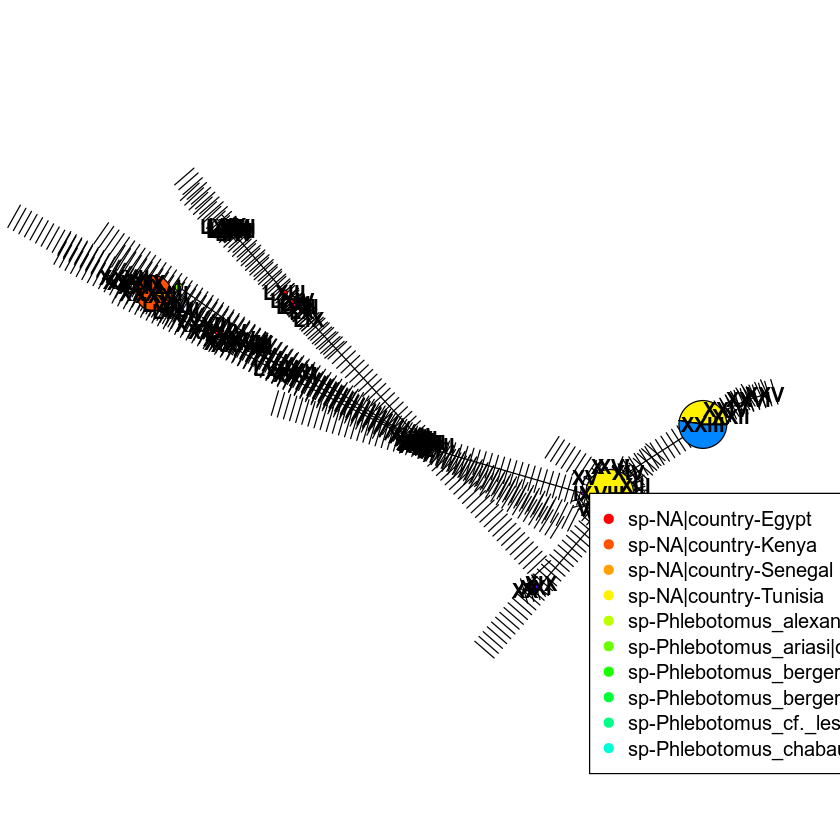

In [9]:
plot(net, size=attr(net, "freq"), scale.ratio=0.8, pie=ind.hap)
legend(-8, 0, colnames(ind.hap), col=rainbow(ncol(ind.hap)), pch=19, ncol=2)